In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv('fandango_scrape.csv')

In [3]:
fandango.head(15)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337
6,Kingsman: The Secret Service (2015),4.5,4.2,15205
7,Minions (2015),4.0,4.0,14998
8,Avengers: Age of Ultron (2015),5.0,4.5,14846
9,Into the Woods (2014),3.5,3.4,13055


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

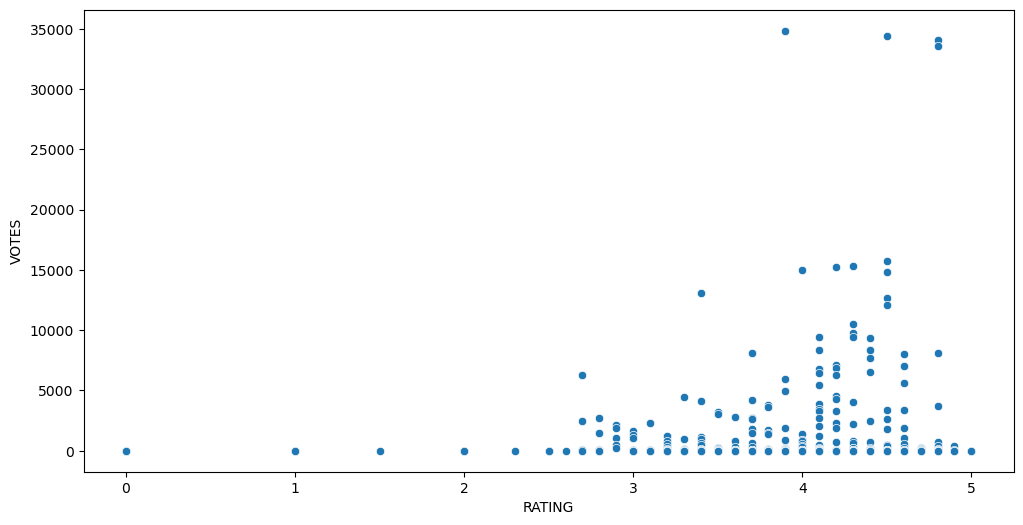

In [6]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='RATING', y='VOTES', data=fandango)

In [7]:
fandango.shape

(504, 4)

In [8]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [9]:
correlation = fandango[["STARS","RATING","VOTES"]].corr()
correlation

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [10]:
#fandango["YEARS"]=fandango["FILM"].str.extract(r'\((\d{4})\)').astype(int)
#fandango.head()

In [11]:
fandango["YEARS"]=fandango['FILM'].str.extract(r'\((\d{4})\)').astype(int)
fandango.head()

,FILM,STARS,RATING,VOTES,YEARS
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [12]:
fandango["YEARS"].value_counts()

YEARS
2015    477
2014     24
2016      1
1964      1
2012      1
Name: count, dtype: int64

In [13]:
len(fandango['YEARS'].unique())

5

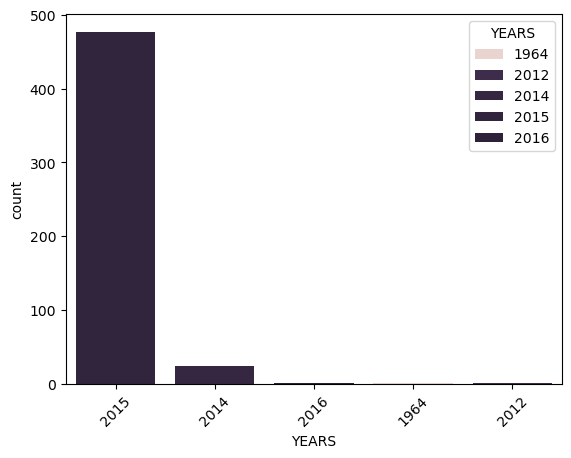

In [14]:
#sns.histplot(data=df, x="Age en annees", bins=48, kde=False, color="blue")
#sns.histplot(fandango['YEARS'], kde=False, bins=len(fandango['YEARS'].unique()))
#sns.histplot(fandango['YEARS'], kde=False, bins=len(fandango['YEARS'].unique()), discrete=True, color='skyblue', hue=fandango['YEARS'])
sns.countplot(x='YEARS', data=fandango, order=fandango['YEARS'].value_counts().index, hue=fandango['YEARS'])
plt.xticks(rotation=45)
plt.show()

In [15]:
fandango['YEARS'].unique()

array([2015, 2014, 2016, 1964, 2012])

In [16]:
fandango.sort_values(by='VOTES', ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEARS
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [17]:
zero_votes = fandango[(fandango['VOTES']==0)]
zero_votes.shape[0]

69

In [18]:
fandango01=fandango[(fandango['VOTES']!=0)]
fandango01.head()

,FILM,STARS,RATING,VOTES,YEARS
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [19]:
fandango01.shape

(435, 5)

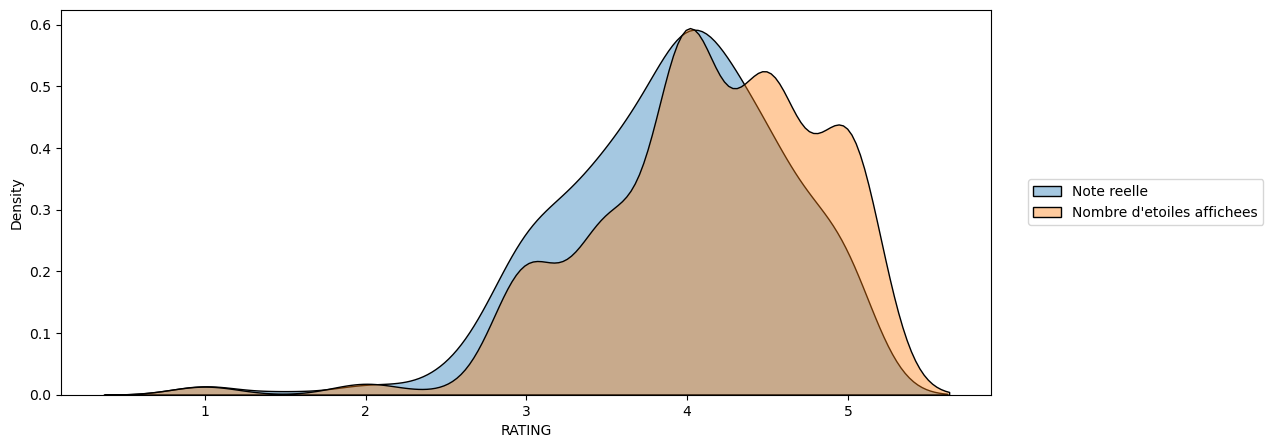

In [20]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=fandango01, x='RATING', multiple='stack', alpha=0.4, label='Note reelle')
sns.kdeplot(data=fandango01, x='STARS', multiple='stack', alpha=0.4, label='Nombre d\'etoiles affichees')
plt.legend(bbox_to_anchor=(1.3,0.5), loc='center right')

In [21]:
fandango01['STARS_DIFF']=(fandango01['STARS']-fandango01['RATING']).round(1)
fandango01.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10276\4212144574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango01['STARS_DIFF']=(fandango01['STARS']-fandango01['RATING']).round(1)


,FILM,STARS,RATING,VOTES,YEARS,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


<Axes: xlabel='STARS_DIFF', ylabel='count'>

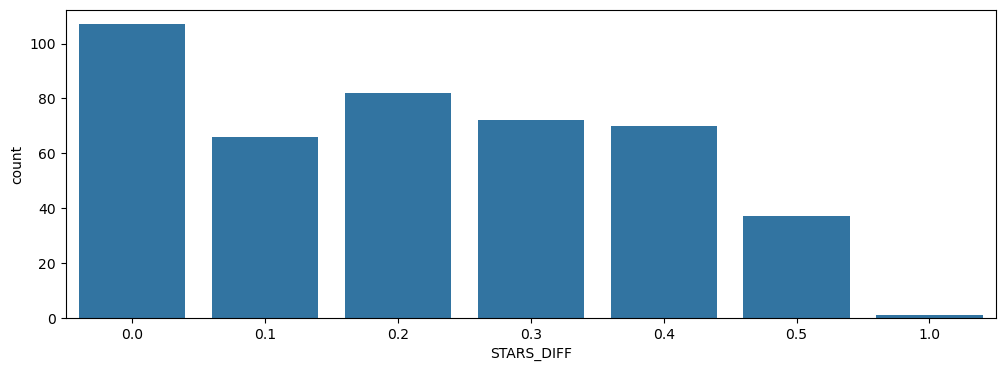

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(x='STARS_DIFF', data=fandango01)

In [23]:
fandango01[fandango01['STARS_DIFF']==1.0]

,FILM,STARS,RATING,VOTES,YEARS,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [24]:
all_sites=pd.read_csv('all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [25]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [26]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


<Axes: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

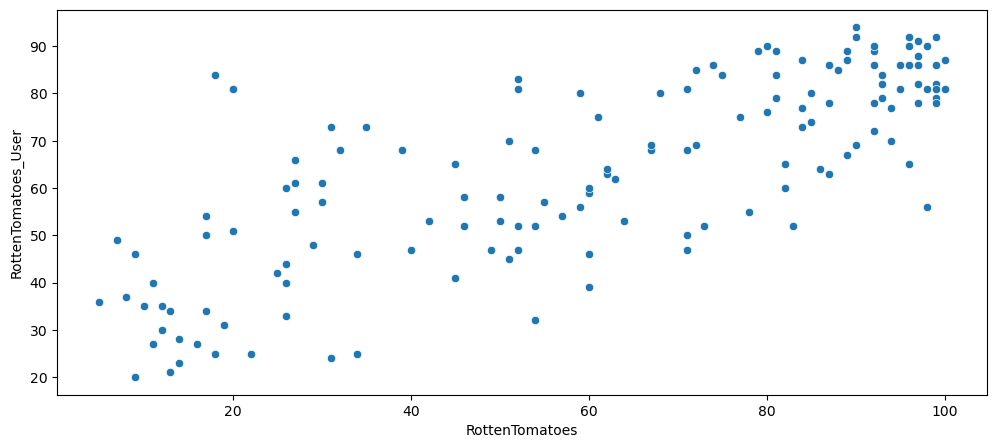

In [27]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='RottenTomatoes', y='RottenTomatoes_User', data=all_sites)

In [28]:
all_sites['Rotten_Diff']=(all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']).round(1)
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [29]:
all_sites['Rotten_Diff_Abs']= all_sites[['Rotten_Diff']].abs()
all_sites['Rotten_Diff_Abs'].mean()

15.095890410958905

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

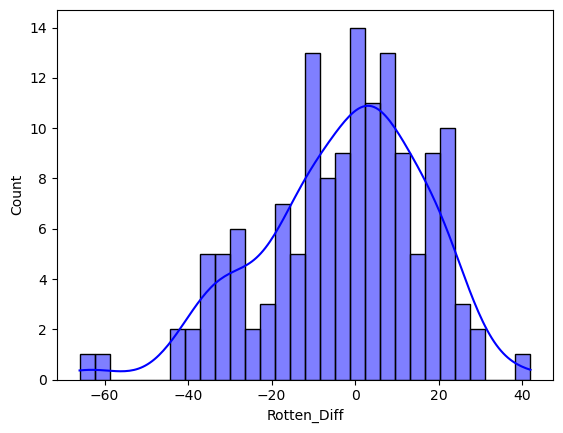

In [30]:
sns.histplot(x='Rotten_Diff', data=all_sites, kde=True,bins=30, color='blue')

<Axes: xlabel='Rotten_Diff_Abs', ylabel='Count'>

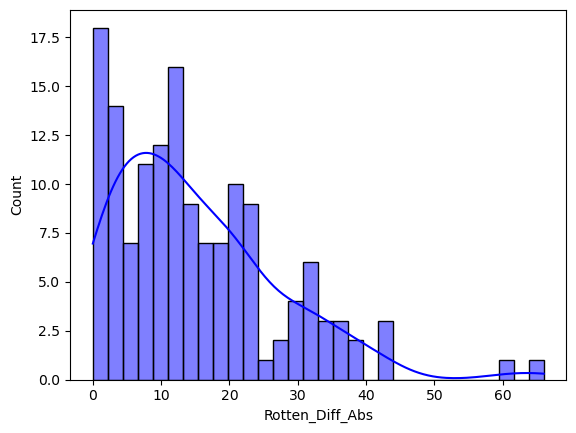

In [31]:
sns.histplot(x='Rotten_Diff_Abs', data=all_sites, kde=True,bins=30, color='blue')

In [32]:
all_sites[['FILM',"Rotten_Diff"]].sort_values(by='Rotten_Diff').head(5)

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


In [33]:
all_sites[["FILM", "Rotten_Diff"]].sort_values(by='Rotten_Diff', ascending=False).head(5)

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

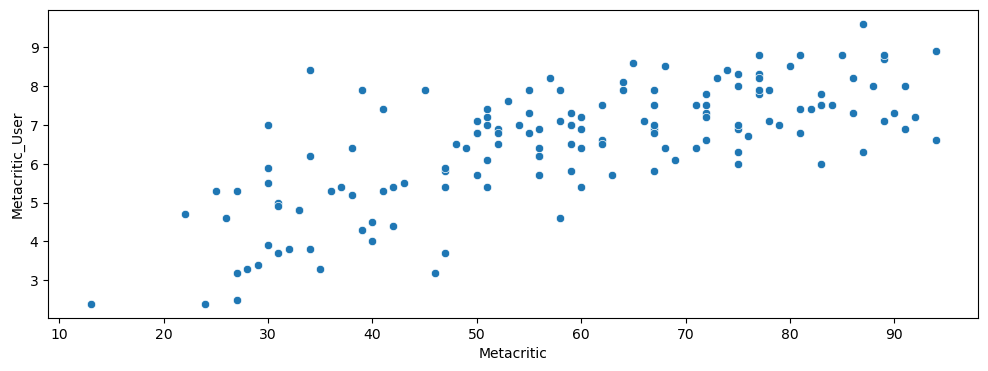

In [34]:
plt.figure(figsize=(12,4))
sns.scatterplot(x='Metacritic', y='Metacritic_User', data=all_sites)

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

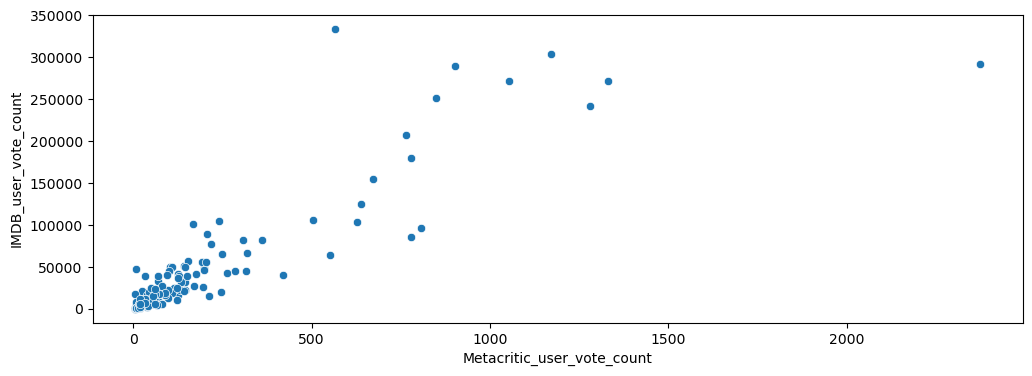

In [35]:
#Metacritic_user_vote_count	IMDB_user_vote_count
plt.figure(figsize=(12,4))
sns.scatterplot(x='Metacritic_user_vote_count', y='IMDB_user_vote_count', data=all_sites)

In [36]:
all_sites.sort_values(by='IMDB_user_vote_count', ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [37]:
all_sites.sort_values(by='Metacritic_user_vote_count', ascending=False).head(1)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


In [38]:
#fandango = fandango.set_index('FILM')
#all_sites = all_sites.set_index('FILM')
#combine= pd.concat([fandango, all_sites], axis=1, join='inner')
dataframe = pd.merge(fandango, all_sites, left_index=True, right_index=True, how='inner')
dataframe.head()

,FILM_x,STARS,RATING,VOTES,YEARS,FILM_y,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Jurassic World (2015),4.5,4.5,34390,2015,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,American Sniper (2015),5.0,4.8,34085,2015,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Furious 7 (2015),5.0,4.8,33538,2015,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Inside Out (2015),4.5,4.5,15749,2015,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14


In [39]:
#common_index = fandango.index.intersection(all_sites.index)
#result = pd.concat([fandango.loc[common_index], all_sites.loc[common_index]], axis=1)
#result.head()

In [40]:
#D = (A - A.mean(axis=0)) / A.std(axis=0)
dataframe['RT_norm']=dataframe['RottenTomatoes']/20
dataframe['RTU_norm']=dataframe['RottenTomatoes_User']/20
dataframe['Meta_norm']=dataframe['Metacritic']/20
dataframe['MetaU_norm']=dataframe['Metacritic_User']/2
dataframe['IMDB_norm']=dataframe['IMDB']/2

dataframe.head().round(1)

,FILM_x,STARS,RATING,VOTES,YEARS,FILM_y,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Rotten_Diff_Abs,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12,3.7,4.3,3.3,3.6,3.9
1,Jurassic World (2015),4.5,4.5,34390,2015,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5,4.2,4.0,3.4,3.8,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10,4.0,4.5,3.2,4.0,3.9
3,Furious 7 (2015),5.0,4.8,33538,2015,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66,0.9,4.2,1.1,2.4,2.7
4,Inside Out (2015),4.5,4.5,15749,2015,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14,0.7,1.4,1.4,1.7,2.6


In [95]:
norm_scores=dataframe[['STARS','RATING','RT_norm','RTU_norm','Meta_norm','MetaU_norm','IMDB_norm']]
norm_scores.head()

,STARS,RATING,RT_norm,RTU_norm,Meta_norm,MetaU_norm,IMDB_norm
0,4.0,3.9,3.70,4.3,3.30,3.55,3.90
1,4.5,4.5,4.25,4.0,3.35,3.75,3.55
2,5.0,4.8,4.00,4.5,3.20,4.05,3.90
3,5.0,4.8,0.90,4.2,1.10,2.35,2.70
4,4.5,4.5,0.70,1.4,1.45,1.70,2.55


<Axes: ylabel='Density'>

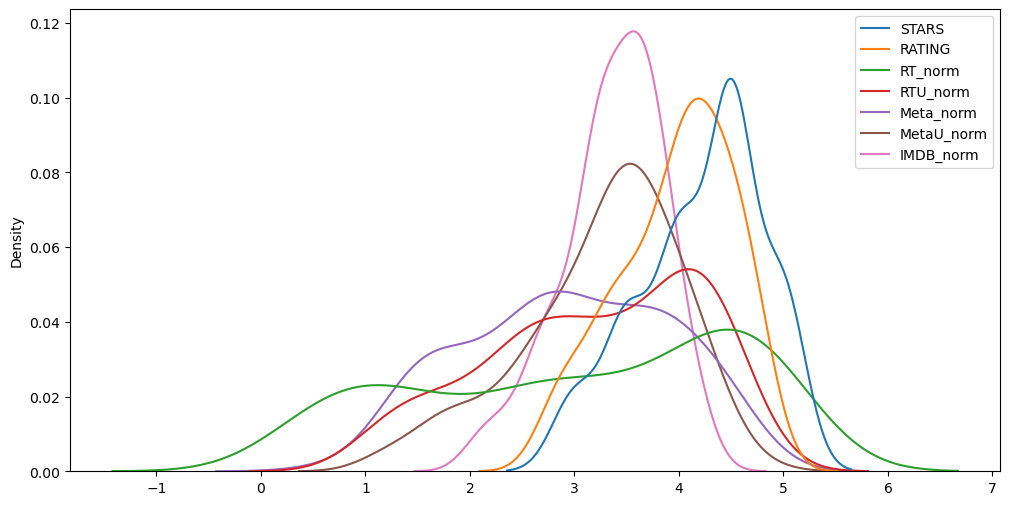

In [107]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=norm_scores)

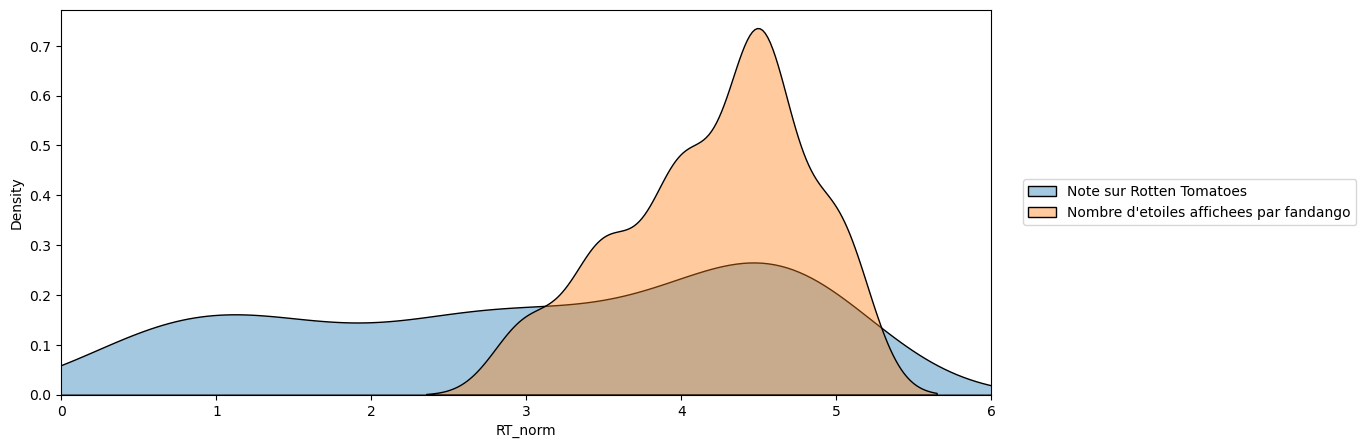

In [113]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=norm_scores, x='RT_norm', multiple='stack', alpha=0.4, label='Note sur Rotten Tomatoes')
sns.kdeplot(data=norm_scores, x='STARS', multiple='stack', alpha=0.4, label='Nombre d\'etoiles affichees par fandango')
plt.xlim(0,6)
plt.legend(bbox_to_anchor=(1.4,0.5), loc='center right')

In [115]:
df.hist(bins=20, figsize=(12, 10), grid=False)
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined